In [3]:
! pip install kaggle

  Running setup.py bdist_wheel for kaggle: started
  Running setup.py bdist_wheel for kaggle: finished with status 'done'
  Stored in directory: C:\Users\Yongcheng Zhu\AppData\Local\pip\Cache\wheels\8b\21\3b\a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify: started
  Running setup.py bdist_wheel for python-slugify: finished with status 'done'
  Stored in directory: C:\Users\Yongcheng Zhu\AppData\Local\pip\Cache\wheels\e3\65\da\2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [4]:
echo %HOMEPATH%

\Users\Yongcheng Zhu


In [5]:
%KAGGLE_CONFIG_DIR%\kaggle.json

UsageError: Line magic function `%KAGGLE_CONFIG_DIR` not found.


In [7]:
import kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# train = pd.read_csv('C:\\Users\\Yongcheng\\train_V2.csv')
f = open('C:\\Users\\Yongcheng Zhu\\OneDrive - business\\一些下载和课程\\IEOR 4523 Data Analytics\\train_V2.csv')
train = pd.read_csv(f)


In [5]:
import gc
import time
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
invalid_match_ids = train[train['winPlacePerc'].isna()]['matchId'].values
train_cleaned = train[-train['matchId'].isin(invalid_match_ids)]

In [60]:
train_cleaned

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.000,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.000,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.000,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.000,0,0,65.67,1,0,0.2143


# Normalize

In [6]:
train_cleaned['playersJoined'] = train_cleaned.groupby('matchId')['matchId'].transform('count')
train_cleaned['killsN'] = train_cleaned['kills']*((100-train_cleaned['playersJoined'])/100 + 1)
train_cleaned['damageDealtN'] = train_cleaned['damageDealt']*((100-train_cleaned['playersJoined'])/100 + 1)

In [14]:
train_cleaned['maxPlaceN'] = train_cleaned['maxPlace']*((100-train_cleaned['playersJoined'])/100 + 1)
train_cleaned['matchDurationN'] = train_cleaned['matchDuration']*((100-train_cleaned['playersJoined'])/100 + 1)

# 1. Headshotrate

In [7]:
train_cleaned['headshotrate'] = train_cleaned['headshotKills'] / train_cleaned['kills']
train_cleaned['headshotrate'].fillna(0, inplace=True)
train_cleaned['headshotrate'].replace(np.inf, 0, inplace=True)

In [8]:
train_cleaned[['kills','headshotrate','headshotKills', 'winPlacePerc']].corr()

,kills,headshotrate,headshotKills,winPlacePerc
kills,1.000000,0.323878,0.674275,0.419916
headshotrate,0.323878,1.000000,0.732312,0.180964
headshotKills,0.674275,0.732312,1.000000,0.277722
winPlacePerc,0.419916,0.180964,0.277722,1.000000


# 2. killStreak rate

In [9]:
train_cleaned['killStreakrate'] = train_cleaned['killStreaks'] / train_cleaned['kills']
train_cleaned['killStreakrate'].fillna(0, inplace=True)
train_cleaned['killStreakrate'].replace(np.inf, 0, inplace=True)
train_cleaned[['kills','killStreakrate','killStreaks', 'winPlacePerc']].corr()

,kills,killStreakrate,killStreaks,winPlacePerc
kills,1.000000,0.367949,0.802500,0.419916
killStreakrate,0.367949,1.000000,0.753871,0.235207
killStreaks,0.802500,0.753871,1.000000,0.377566
winPlacePerc,0.419916,0.235207,0.377566,1.000000


# 3. healthitems

In [10]:
train_cleaned['healthitems'] = train_cleaned['heals'] + train_cleaned['boosts']
train_cleaned['boostsPerWDistance'] = train_cleaned['boosts']/train_cleaned['walkDistance']
train_cleaned['boostsPerWDistance'].fillna(0, inplace=True)
train_cleaned['boostsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned['healsPerWDistance'] = train_cleaned['heals']/train['walkDistance']
train_cleaned['healsPerWDistance'].fillna(0, inplace=True)
train_cleaned['healsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned['healsAndBoostsPerWDistance'] = train_cleaned['healthitems']/train['walkDistance']
train_cleaned['healsAndBoostsPerWDistance'].fillna(0, inplace=True)
train_cleaned['healsAndBoostsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned[['heals','healthitems','boosts','boostsPerWDistance','healsPerWDistance','healsAndBoostsPerWDistance', 'winPlacePerc']].corr()

,heals,healthitems,boosts,boostsPerWDistance,healsPerWDistance,healsAndBoostsPerWDistance,winPlacePerc
heals,1.000000,0.927683,0.535854,0.177478,0.223403,0.251409,0.427857
healthitems,0.927683,1.000000,0.812341,0.282540,0.176842,0.233393,0.575998
boosts,0.535854,0.812341,1.000000,0.361705,0.050954,0.135091,0.634234
boostsPerWDistance,0.177478,0.282540,0.361705,1.000000,0.156708,0.388261,0.130299
healsPerWDistance,0.223403,0.176842,0.050954,0.156708,1.000000,0.971007,0.022040
healsAndBoostsPerWDistance,0.251409,0.233393,0.135091,0.388261,0.971007,1.000000,0.052103
winPlacePerc,0.427857,0.575998,0.634234,0.130299,0.022040,0.052103,1.000000


# 4. Kills and assits for two or more players

In [11]:
train_cleaned['kills_assists'] = train_cleaned['kills'] + train_cleaned['assists']
train_cleaned['killsPerWDistance'] = train_cleaned['kills']/train_cleaned['walkDistance']
train_cleaned['killsPerWDistance'].fillna(0, inplace=True)
train_cleaned['killsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned[['kills','assists','kills_assists','killsPerWDistance', 'winPlacePerc']].corr()

,kills,assists,kills_assists,killsPerWDistance,winPlacePerc
kills,1.000000,0.319690,0.952618,0.039823,0.419916
assists,0.319690,1.000000,0.592749,0.008289,0.299441
kills_assists,0.952618,0.592749,1.000000,0.036510,0.453051
killsPerWDistance,0.039823,0.008289,0.036510,1.000000,-0.017987
winPlacePerc,0.419916,0.299441,0.453051,-0.017987,1.000000


# 5. Total Distance

In [12]:
train_cleaned['totalDistance'] = train_cleaned['walkDistance']+train_cleaned['rideDistance']+train_cleaned['swimDistance']
train_cleaned[['totalDistance','walkDistance','rideDistance','swimDistance', 'winPlacePerc']].corr()

,totalDistance,walkDistance,rideDistance,swimDistance,winPlacePerc
totalDistance,1.000000,0.757859,0.855586,0.138718,0.677037
walkDistance,0.757859,1.000000,0.310936,0.167509,0.810888
rideDistance,0.855586,0.310936,1.000000,0.049448,0.342915
swimDistance,0.138718,0.167509,0.049448,1.000000,0.149607
winPlacePerc,0.677037,0.810888,0.342915,0.149607,1.000000


# 6. Numbers of people in the team 

In [13]:
train_cleaned['Numin1team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train_cleaned['numGroups']]
# train_cleaned['team'] = 1
# for i in range(len(train['numGroups'])):
#     if train['numGroups'].iloc[i]>50:
#         train_cleaned['team'].iloc[i] = 1
#     elif train['numGroups'].iloc[i]>25 and train['numGroups'].iloc[i]<=50:
#         train_cleaned['team'].iloc[i] = 2
#     else:
#         train_cleaned['team'].iloc[i] = 4

# Others

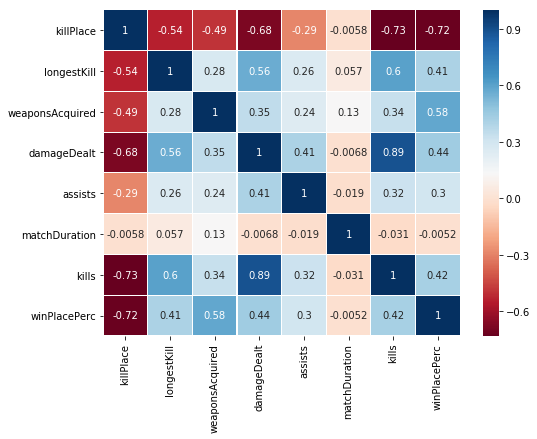

In [7]:
#Others
train_cleaned['weaponsAcquired']
train_cleaned['killPlace']
#train_cleaned['damageDealt']
train_cleaned['longestKill']

corr = train_cleaned[['killPlace', 'longestKill', 'weaponsAcquired', 'damageDealt', 'assists', 'matchDuration', 'kills', 'winPlacePerc']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()